# Data reading of the database
A.Iragena supervised by Mr Kaufmann

In [551]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import sqlite3 
from sqlite3 import Error


In [552]:
from striplog.striplog import Striplog
from striplog import Legend, Lexicon, Interval, Component, Position


In [553]:
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)
 
    return conn
 

In [554]:
def select_datat_of_db(conn,table):
    """
    Query all rows in the tasks table
    :param conn: the Connection object
    :return:
    """
    cur = conn.cursor()
    cur.execute(table)
 
    rows = cur.fetchall()
    #result = [dict(row) for row in cur.fetchall()]
    for row in rows:
        print(row)
    return(rows)
    #return(result)

In [555]:
database = r"project_database.db"

### Create a database connection & import the data from the database

In [556]:
import pandas as pd

In [557]:
#conn = create_connection(database)
#bhs=pd.read_sql("SELECT * FROM Boreholes", conn)

In [558]:
#bhs

The code below read the database and put the data in the dataframe dfs

In [559]:
# tables = ['Boreholes', 'Component', 'Intervals', 'lexicon']
# for i in tables:    
#     print("---{table:s} data--- ".format(table=i))

In [560]:
conn = create_connection(database)
tables = ['Boreholes', 'Components', 'Intervals', 'Lexicon'] # table names in the database
dfs = {}
with conn:    
    for i in tables:    
        print("---{table:s} data--- ".format(table=i))
        sql_cmd = "SELECT * FROM {table:s}".format(table=i) # to select the data of the table Boreholes
        dfs.update({i:  pd.read_sql(sql_cmd, conn)})

---Boreholes data--- 
---Components data--- 
---Intervals data--- 
---Lexicon data--- 


### Manipulation of the dataframe 

In [561]:
dfs['Intervals'] # just to check if the content of Intervals table is correct

,borehole,top,base,description
0,F10,0.0,1.5,remblais non-saturés
1,F10,1.5,4.0,remblais saturés
2,F10,4.0,6.0,alluvions
3,F11,0.0,1.5,remblais non-saturés
4,F11,1.5,4.0,remblais saturés
5,F11,4.0,6.0,alluvions
6,F12,0.0,1.5,remblais non-saturés
7,F12,1.5,4.0,remblais saturés
8,F12,4.0,6.0,alluvions
9,F13,0.0,1.5,remblais non-saturés


In [562]:
dfs['Components'].query('borehole=="F25" and key=="color"') # To look for the color of the bh F25, in Component table

,borehole,top,base,key,value
73,F25,0.0,1.5,color,brun
75,F25,1.5,4.0,color,ocre
77,F25,4.0,6.0,color,gris


In [563]:
dfs['Intervals'].head()

,borehole,top,base,description
0,F10,0.0,1.5,remblais non-saturés
1,F10,1.5,4.0,remblais saturés
2,F10,4.0,6.0,alluvions
3,F11,0.0,1.5,remblais non-saturés
4,F11,1.5,4.0,remblais saturés


In [564]:
dfs['Components'].head()

,borehole,top,base,key,value
0,F10,0.0,1.5,lithology,remblais
1,F10,0.0,1.5,color,brun
2,F10,1.5,4.0,lithology,remblais
3,F10,1.5,4.0,color,ocre
4,F10,4.0,6.0,lithology,silt


In [565]:
bh_test = 'F10'
dfs['Intervals'].query('borehole=="{borehole:s}"'.format(borehole=bh_test)) # show all the intervals of bh_test

,borehole,top,base,description
0,F10,0.0,1.5,remblais non-saturés
1,F10,1.5,4.0,remblais saturés
2,F10,4.0,6.0,alluvions


In [566]:
bh_test = 'F10'
dfs['Intervals'].query('borehole=="{borehole:s}"'.format(borehole=bh_test))['top'] # Only shows the column 'Top' for bh_test

0    0.0
1    1.5
2    4.0
Name: top, dtype: float64

### Creation of the striplog object for 1 borehole

In [567]:
bh_test = 'F10'
bh_strip = []  # striplog object 
intervals = dfs['Intervals'].query('borehole=="{borehole:s}"'.format(borehole=bh_test))[['top','base', 'description']]
for row in intervals.iterrows():
    components = dfs['Components'].query('borehole=="{borehole:s}" and top=={top:f} and base=={base:f}'.format(borehole=bh_test, top=row[1]['top'], base=row[1]['base']))
    components_dict={}
    for r in components.iterrows():
        components_dict.update({r[1]['key']:r[1]['value']})
    bh_strip.append({'top': Position(middle=row[1]['top'], units='m'), 
          'base': Position(middle=row[1]['base'], units='m'),
          'description': row[1]['description'], 'components': [Component(components_dict)]})

In [568]:
bh_strip

[{'top': Position({'middle': 0.0, 'upper': 0.0, 'lower': 0.0, 'units': 'm'}),
  'base': Position({'middle': 1.5, 'units': 'm'}),
  'description': 'remblais non-saturés',
  'components': [Component({'lithology': 'remblais', 'color': 'brun'})]},
 {'top': Position({'middle': 1.5, 'units': 'm'}),
  'base': Position({'middle': 4.0, 'units': 'm'}),
  'description': 'remblais saturés',
  'components': [Component({'lithology': 'remblais', 'color': 'ocre'})]},
 {'top': Position({'middle': 4.0, 'units': 'm'}),
  'base': Position({'middle': 6.0, 'units': 'm'}),
  'description': 'alluvions',
  'components': [Component({'lithology': 'silt', 'color': 'gris'})]}]

In [569]:
for bh_row in dfs['Boreholes'].iterrows():
    print(bh_row[1][0])

F10
F11
F12
F13
F14
F15
F16
F20
F21
F22
F23
F24
F25


### Defining of legend

In [570]:
new_legend="legend_GSDMA.csv"  # A specific legend has been created which in islegend_GSDMA.csv
my_legend = Legend.from_csv(filename=new_legend)
legend = Legend.builtin('NSDOE')
lexicon = Lexicon.default()

#legend = Legend.builtin('GSDMA') 
print(my_legend)

Decor({'_colour': '#91662b', 'width': 5.0, 'component': Component({'lithology': 'none', 'colour': 'ocre'}), 'hatch': None})
Decor({'_colour': '#777545', 'width': 5.0, 'component': Component({'lithology': 'none', 'colour': 'vert'}), 'hatch': None})
Decor({'_colour': '#b4a87d', 'width': None, 'component': Component({'lithology': 'none', 'colour': 'gris brun'}), 'hatch': None})
Decor({'_colour': '#7a7861', 'width': None, 'component': Component({'lithology': 'none', 'colour': 'vert foncé'}), 'hatch': None})
Decor({'_colour': '#d9d6b7', 'width': None, 'component': Component({'lithology': 'none', 'colour': 'gris blanc'}), 'hatch': None})
Decor({'_colour': '#7e8388', 'width': None, 'component': Component({'lithology': 'none', 'colour': 'gris'}), 'hatch': None})
Decor({'_colour': '#9a887f', 'width': None, 'component': Component({'lithology': 'none', 'colour': 'gris violet'}), 'hatch': None})
Decor({'_colour': '#593c1e', 'width': None, 'component': Component({'lithology': 'none', 'colour': 'bru

In [571]:
print(Legend.builtin('NSDOE'))

Decor({'_colour': '#f7e9a6', 'width': 3.0, 'component': Component({'lithology': 'sandstone', 'colour': 'grey', 'grainsize': 'vf-f'}), 'hatch': None})
Decor({'_colour': '#ff99cc', 'width': 2.0, 'component': Component({'lithology': 'anhydrite'}), 'hatch': None})
Decor({'_colour': '#dbd6bc', 'width': 3.0, 'component': Component({'lithology': 'heterolithic', 'colour': 'grey'}), 'hatch': None})
Decor({'_colour': '#ff4c4a', 'width': 2.0, 'component': Component({'lithology': 'volcanic'}), 'hatch': None})
Decor({'_colour': '#86f0b6', 'width': 5.0, 'component': Component({'lithology': 'conglomerate'}), 'hatch': None})
Decor({'_colour': '#ff96f6', 'width': 2.0, 'component': Component({'lithology': 'halite'}), 'hatch': None})
Decor({'_colour': '#f2ff42', 'width': 4.0, 'component': Component({'lithology': 'sandstone', 'colour': 'grey', 'grainsize': 'f-m'}), 'hatch': None})
Decor({'_colour': '#dbc9bc', 'width': 3.0, 'component': Component({'lithology': 'heterolithic', 'colour': 'red'}), 'hatch': No

# Complete extraction of boreholes from the database

In [572]:
bhs_striplog = {}
for bh_row in dfs['Boreholes'].iterrows(): # For all bh
    bh_strip = []
    intervals = dfs['Intervals'].query('borehole=="{borehole:s}"'.format(borehole=bh_row[1][0]))[['top','base', 'description']] # Look for the interval for the bh
    for row in intervals.iterrows():
        components = dfs['Components'].query('borehole=="{borehole:s}" and top=={top:f} and base=={base:f}'.format(borehole=bh_row[1][0], top=row[1]['top'], base=row[1]['base'])) # Look for components of the bh
        components_dict={}
        for r in components.iterrows():
            components_dict.update({r[1]['key']:r[1]['value']})
        bh_strip.append({'top': Position(middle=row[1]['top'], units='m'), 
              'base': Position(middle=row[1]['base'], units='m'),
              'description': row[1]['description'],'data': {}, 'components': [Component(components_dict)]})
    bhs_striplog.update({bh_row[1][0]: bh_strip})

In [573]:
bhs_striplog # Boreholes data in striplog structure

{'F10': [{'top': Position({'middle': 0.0, 'upper': 0.0, 'lower': 0.0, 'units': 'm'}),
   'base': Position({'middle': 1.5, 'units': 'm'}),
   'description': 'remblais non-saturés',
   'data': {},
   'components': [Component({'lithology': 'remblais', 'color': 'brun'})]},
  {'top': Position({'middle': 1.5, 'units': 'm'}),
   'base': Position({'middle': 4.0, 'units': 'm'}),
   'description': 'remblais saturés',
   'data': {},
   'components': [Component({'lithology': 'remblais', 'color': 'ocre'})]},
  {'top': Position({'middle': 4.0, 'units': 'm'}),
   'base': Position({'middle': 6.0, 'units': 'm'}),
   'description': 'alluvions',
   'data': {},
   'components': [Component({'lithology': 'silt', 'color': 'gris'})]}],
 'F11': [{'top': Position({'middle': 0.0, 'upper': 0.0, 'lower': 0.0, 'units': 'm'}),
   'base': Position({'middle': 1.5, 'units': 'm'}),
   'description': 'remblais non-saturés',
   'data': {},
   'components': [Component({'lithology': 'remblais', 'color': 'brun'})]},
  {'top'

In [574]:
s_to_plot="F10"                  # Nom du bh à plotter avec striplog
s_list=bhs_striplog[s_to_plot]  # List d'intervalles du bh: s_to_plot

i1 = Interval(top=0, base=10, components=[Component({'lithology': 'none','colour': 'ocre'})])
i2 = Interval(top=10, base=40, components=[Component({'lithology': 'none','colour': 'vert'})])
i=[i1,i2]
# print(i)
s_striplog=Striplog([i1,i2])


# s_striplog=Striplog.__init__(None,i, source=None, order='auto') # conversion en object striplog

In [575]:
print(i1)

{'top': Position({'middle': 0.0, 'upper': 0.0, 'lower': 0.0, 'units': 'm'}), 'base': Position({'middle': 10.0, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'lithology': 'none', 'color': 'ocre'})]}


In [577]:
print(s_list[0])

{'top': Position({'middle': 0.0, 'upper': 0.0, 'lower': 0.0, 'units': 'm'}), 'base': Position({'middle': 1.5, 'units': 'm'}), 'description': 'remblais non-saturés', 'data': {}, 'components': [Component({'lithology': 'remblais', 'color': 'brun'})]}


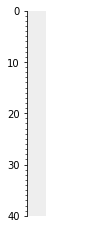

In [578]:
#s_striplog.plot(my_legend, ladder=True, aspect=2) # aspect : échelle de graphe
s_striplog.plot(my_legend, ladder=True, aspect=2)

In [230]:
bh_test = 'F10'
bh_strip = []  # striplog object 
intervals = dfs['Intervals'].query('borehole=="{borehole:s}"'.format(borehole=bh_test))[['top','base', 'description']]
for row in intervals.iterrows():
    components = dfs['Components'].query('borehole=="{borehole:s}" and top=={top:f} and base=={base:f}'.format(borehole=bh_test, top=row[1]['top'], base=row[1]['base']))
    components_dict={}
    for r in components.iterrows():
        components_dict.update({r[1]['key']:r[1]['value']})
    bh_strip.append({'top': Position(middle=row[1]['top'], units='m'), 
          'base': Position(middle=row[1]['base'], units='m'),
          'description': row[1]['description'], 'components': [Component(components_dict)]})

In [232]:
#Version modifiée
bh_test = 'F10'
#bh1_strip = []  # striplog object 
intervals = dfs['Intervals'].query('borehole=="{borehole:s}"'.format(borehole=bh_test))[['top','base', 'description']]
for row in intervals.iterrows():
    components = dfs['Components'].query('borehole=="{borehole:s}" and top=={top:f} and base=={base:f}'.format(borehole=bh_test, top=row[1]['top'], base=row[1]['base']))
    components_dict={}
    for r in components.iterrows():
        components_dict.update({r[1]['key']:r[1]['value']})
        bh1_strip[r]=Interval({'top': Position(middle=row[1]['top'], units='m'), 
                            'base': Position(middle=row[1]['base'], units='m'),
                            'description': row[1]['description'], 'components': [Component(components_dict)]})
        
#     bh1_strip.append({'top': Position(middle=row[1]['top'], units='m'), 
#           'base': Position(middle=row[1]['base'], units='m'),
#           'description': row[1]['description'], 'components': [Component(components_dict)]})

TypeError: float() argument must be a string or a number, not 'dict'

In [79]:
bh_test = 'F10'
bh_strip = []  # striplog object 
Interval[bh_test] = dfs['Intervals'].query('borehole=="{borehole:s}"'.format(borehole=bh_test))[['top','base', 'description']]
for row in intervals.iterrows():
    components = dfs['Components'].query('borehole=="{borehole:s}" and top=={top:f} and base=={base:f}'.format(borehole=bh_test, top=row[1]['top'], base=row[1]['base']))
    components_dict={}
    for r in components.iterrows():
        Component=components_dict.update({r[1]['key']:r[1]['value']})
    bh_strip.append({'top': Position(middle=row[1]['top'], units='m'), 
          'base': Position(middle=row[1]['base'], units='m'),
          'description': row[1]['description'], 'components': [Component(components_dict)]})

TypeError: 'NoneType' object is not callable

In [ ]:
type(bhs_striplog)

In [ ]:
bhs_striplog["F10"]["Intervals"]

In [ ]:
#cd GSDMA2019/playground/Striplog_read_database

In [ ]:
imgfile="M-MG-70_14-3_135.9.png"

In [ ]:
#imgfile="M-MG-70_14-3_135.9.png"
#strip = Striplog.from_img(imgfile, 14.3, 135.9, legend=Legend)

In [ ]:
#striplog = Striplog.from_img(imgfile, 14.3, 135.9, legend=legend)


In [ ]:
s=Striplog.setdefault?

In [ ]:
s=Striplog.setdefault

In [ ]:
Striplog

## Add lexicon

In [ ]:
dfs['lexicon']

In [ ]:
bh_strip.append(dfs['lexicon']) # Command to add smthg 

#### Structure of 1 interval of the striplog
{'top': Position({'middle': 51.24117647058824, 'units': 'm'}), 'base': Position({'middle': 54.81764705882354, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'lithology': 'sandstone', 'colour': 'grey', 'grainsize': 'vf-f'})]}


In [ ]:
bh_strip


# Trials

In [ ]:
def from_sqlite_Row_to_dict(list_with_rows):
    ''' Turn a list with sqlite3.Row objects into a dictionary'''
    d ={} # the dictionary to be filled with the row data and to be returned

    for i, row in enumerate(list_with_rows): # iterate throw the sqlite3.Row objects            
        l = [] # for each Row use a separate list
        for col in range(0, len(row)): # copy over the row date (ie. column data) to a list
            l.append(row[col])
        d[i] = l # add the list to the dictionary   
    return d

In [ ]:
dic=from_sqlite_Row_to_dict(comp)


In [ ]:
d['F10', ] 


In [ ]:
conn = create_connection(database)
with conn:    
        
    print("---BOREHOLES data--- ")
    table_bh="SELECT * FROM Boreholes" # to select the data of the table Boreholes
    bh=select_datat_of_db(conn,table_bh)
    
    print("---COMPONENTS data--- ")
    table_comp="SELECT * FROM Component" # to select the data of the table component
    comp=select_datat_of_db(conn,table_comp)
    
    print("---INTERVAL data--- ")
    table_int="SELECT * FROM Intervals" # to select the data of the table Intervals
    intvl=select_datat_of_db(conn,table_int)
    
    print("---LEXICON--- ")
    table_lex="SELECT * FROM lexicon" # to select the data of the table Intervals
    lex=select_datat_of_db(conn,table_lex)
    
    
 

In [ ]:
conn = create_connection(database)
with conn:    
        
    print("---BOREHOLES data--- ")
    table_bh="SELECT * FROM Boreholes" # to select the data of the table Boreholes
    bh=select_datat_of_db(conn,table_bh)
    
    print("---COMPONENTS data--- ")
    table_comp="SELECT * FROM Component" # to select the data of the table component
    comp=select_datat_of_db(conn,table_comp)
    
    print("---INTERVAL data--- ")
    table_int="SELECT * FROM Intervals" # to select the data of the table Intervals
    intvl=select_datat_of_db(conn,table_int)
    
    print("---LEXICON--- ")
    table_lex="SELECT * FROM lexicon" # to select the data of the table Intervals
    lex=select_datat_of_db(conn,table_lex)
 
 

In [ ]:
bh # is a list, cause it has brackets
bh[0]
lex
type(intvl)
intvl[0][0]
bh[1][0]
comp[1][4]
lexicon=lex